# 0. Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. The concepts of baseband and subcarrier signals

The OFDM (Orthogonal Frequency Division Multiplexing) is a modulation technique that allows to transmit a high rate of data over a channel with a low bandwidth. This is achieved by dividing the available bandwidth into a number of subcarriers, each one with a low symbol rate. The subcarriers are orthogonal to each other, which means that they do not interfere with each other. The OFDM is used in many wireless communication systems, such as the IEEE 802.11a/g/n/ac (WiFi), IEEE 802.16 (WiMAX), LTE, DVB-T, DAB, etc.

So we have a formula for the OFDM signal $s(t)$:

$$s(t) = \sum_{k=0}^{N-1} x_k(t) e^{j2\pi f_k t}$$

where $x_k(t)$ is the baseband signal of the $k$-th subcarrier, $f_k$ is the frequency of the $k$-th subcarrier, and $N$ is the number of subcarriers. The baseband signal $x_k(t)$ is a complex signal with a low symbol rate. The baseband signals of all subcarriers are orthogonal to each other, which means that they do not interfere with each other. The baseband signals are modulated onto the subcarriers using the Inverse Fast Fourier Transform (IFFT). The subcarriers are modulated onto the OFDM signal using the Fast Fourier Transform (FFT).

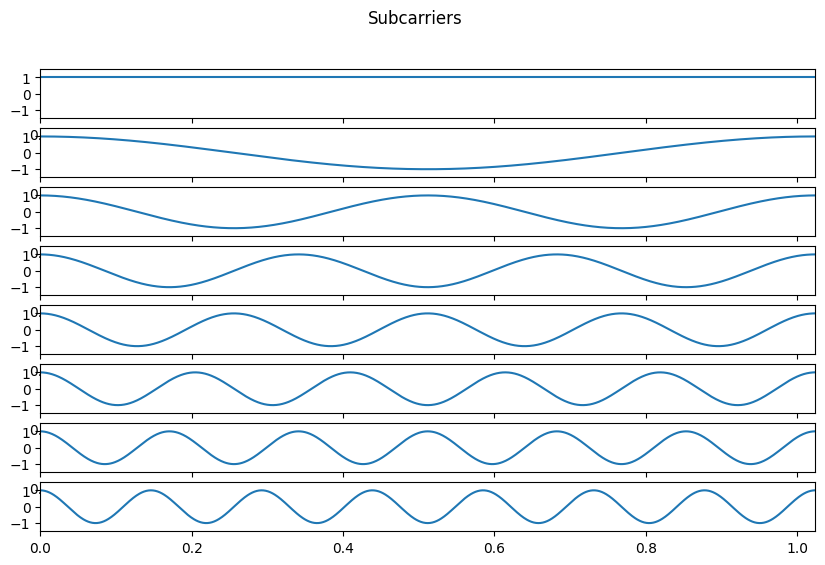

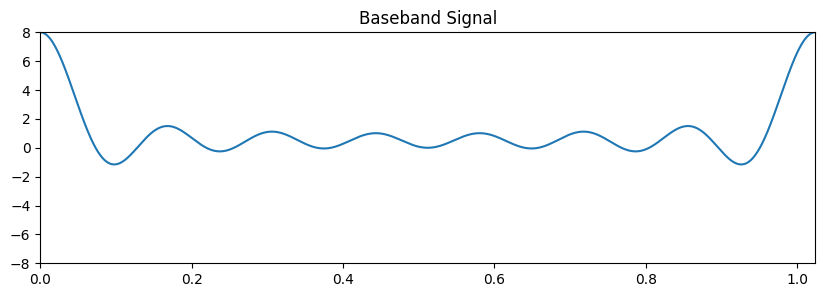

In [5]:
# Parameters
num_subcarriers = 8
symbol_length = 1024  # Number of samples
fs = 1000  # Sampling frequency
T = symbol_length/fs  # Symbol period

# Time axis
t = np.linspace(0, T, symbol_length, endpoint=False)  # Exclude endpoint to have exactly one period

# Generate subcarriers
subcarriers = []
for k in range(num_subcarriers):
    fc = k / T  # Subcarrier frequency
    subcarrier = np.cos(2 * np.pi * fc * t)
    subcarriers.append(subcarrier)

# Sum subcarriers to form baseband signal
baseband_signal = np.sum(subcarriers, axis=0)

# Plot subcarriers
plt.figure(figsize=(10, 6))
for idx, subcarrier in enumerate(subcarriers, 1):
    plt.subplot(num_subcarriers, 1, idx)
    plt.plot(t, subcarrier)
    plt.xlim([0, symbol_length/fs])
    plt.ylim([-1.5, 1.5])
plt.suptitle('Subcarriers')

# Plot baseband signal
plt.figure(figsize=(10, 3))
plt.plot(t, baseband_signal)
plt.title('Baseband Signal')
plt.xlim([0, symbol_length/fs])
plt.ylim([-num_subcarriers, num_subcarriers])

plt.show()

## 1.1. Orthogonality Validation

The orthogonality of two signals $x(t)$ and $y(t)$ is defined as:

$$\int_{-\infty}^{\infty} x(t) y^*(t) dt = 0$$

where $y^*(t)$ is the complex conjugate of $y(t)$. The orthogonality of two signals can be verified by calculating the integral of their product. If the integral is zero, then the two signals are orthogonal to each other.

In [8]:
# To verify the orthogonality of subcarriers, we can calculate the inner product of subcarriers.
for i in range(num_subcarriers):
    for j in range(num_subcarriers):
        if i == j:
            continue
        
        # Calculate the inner product of subcarriers
        inner_product = np.sum(subcarriers[i] * subcarriers[j])

        # As the inner product will be too small, so we have to set a threshold
        if np.abs(inner_product) < 1e-10:
            inner_product = 0

        # The inner product should be zero
        if inner_product != 0:
            print('Subcarrier {} and {} are not orthogonal'.format(i, j))
            break

print('Check orthogonality: Finished')

Check orthogonality: Finished


# 2. Use the OFDM technique to transmit a message

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Step 1: Binary Encoding
message = "Hello, World"
binary_message = ''.join(format(ord(ch), '08b') for ch in message)

# Parameters
num_subcarriers = 8
symbol_length = len(binary_message)  # Adjusting symbol length to match message length
fs = 1000  # Sampling frequency
T = symbol_length/fs  # Symbol period

# Time axis
t = np.linspace(0, T, symbol_length, endpoint=False)  # Exclude endpoint to have exactly one period

# Step 2: Modulation (BPSK)
modulated_data = np.array([1 if bit == '1' else -1 for bit in binary_message])

# Distribute modulated data across subcarriers
data_per_subcarrier = len(modulated_data) // num_subcarriers
subcarrier_data = modulated_data.reshape((num_subcarriers, data_per_subcarrier))

# Step 3: OFDM Encoding (IFFT)
ofdm_symbols = ifft(subcarrier_data, axis=1)

# Sum subcarriers to form baseband signal
baseband_signal = np.sum(ofdm_symbols, axis=0)

# Step 4: Channel Transmission
# (For simplicity, we'll skip this step)

# Step 5: OFDM Decoding (FFT)
received_symbols = fft(ofdm_symbols, axis=1)

# Step 6: Demodulation
demodulated_data = np.where(received_symbols.real > 0, '1', '0')

# Merge demodulated data from all subcarriers into one array
demodulated_data_merged = ''.join(demodulated_data.flatten())

# Step 7: Binary Decoding
decoded_message = ''.join(chr(int(demodulated_data_merged[i:i+8], 2)) for i in range(0, len(demodulated_data_merged), 8))

# Output the decoded message
print(decoded_message)

Hello, World


## Sine signal for real parts

In [2]:
def gen_sine_wave(A, f, fs, phi, t):
    """
    生成正弦信号

    Parameters
    ----------
    A : float
        正弦信号的振幅

    f : float
        正弦信号的频率

    fs : float
        正弦信号的采样频率

    phi : float
        正弦信号的相位

    t : float
        正弦信号的时间长度
    """

    # 若时间序列长度为 t=1s, 
    # 采样频率 fs=1000 Hz, 则采样时间间隔 Ts=1/fs=0.001s
    # 对于时间序列采样点个数为 n=t/Ts=1/0.001=1000, 即有1000个点,每个点间隔为 T
    Ts = 1/fs
    n = t / Ts
    n = np.arange(n)
    y = A*np.sin(2*np.pi*f*n*Ts + phi*(np.pi/180))
    return y

## Cosine signal for imaginary parts

In [3]:
def gen_cosine_wave(A, f, fs, phi, t):
    Ts = 1/fs
    n = t / Ts
    n = np.arange(n)
    y = A*np.cos(2*np.pi*f*n*Ts + phi*(np.pi/180))
    return y

# Generate a set of complex signals

Those signals will be treated as a set of subcarriers.

In [4]:
# Generate 

(2, 100)
(2, 100)
(2, 100)
(2, 100)


# Basic Functions to analyze signals

## Calculate the amplittude of a complex array

To calculate the amplitude of a one-dimensional array of complex numbers, we first need to understand what the amplitude of a complex number is. for a complex number $z = a + bi$, the amplitude of $|z|$ is defined as:

$$|z| =\sqrt{a^2 + b^2}$$

In [5]:
def amplitude(complex_signal):
    """
    计算复信号的幅度

    Parameters
    ----------
    complex_signal : complex
        复信号
    """
    return np.sqrt(complex_signal[0]**2 + complex_signal[1]**2)

## Calculate the dB (Decibel) of a complex array

To calculate the db of a one-dimensional array of complex numbers, we first need to understand what the db of a complex number is. for a complex number $z = a + bi$, the db of $z$ is defined as:

$$db(z) = 20\log_{10}(|z|)$$

In [7]:
def db(complex_signal):
    """
    计算复信号的分贝值

    Parameters
    ----------
    complex_signal : complex
        复信号
    """
    # 分贝值 = 20 * log10(幅度)
    return 20 * np.log10(amplitude(complex_signal))

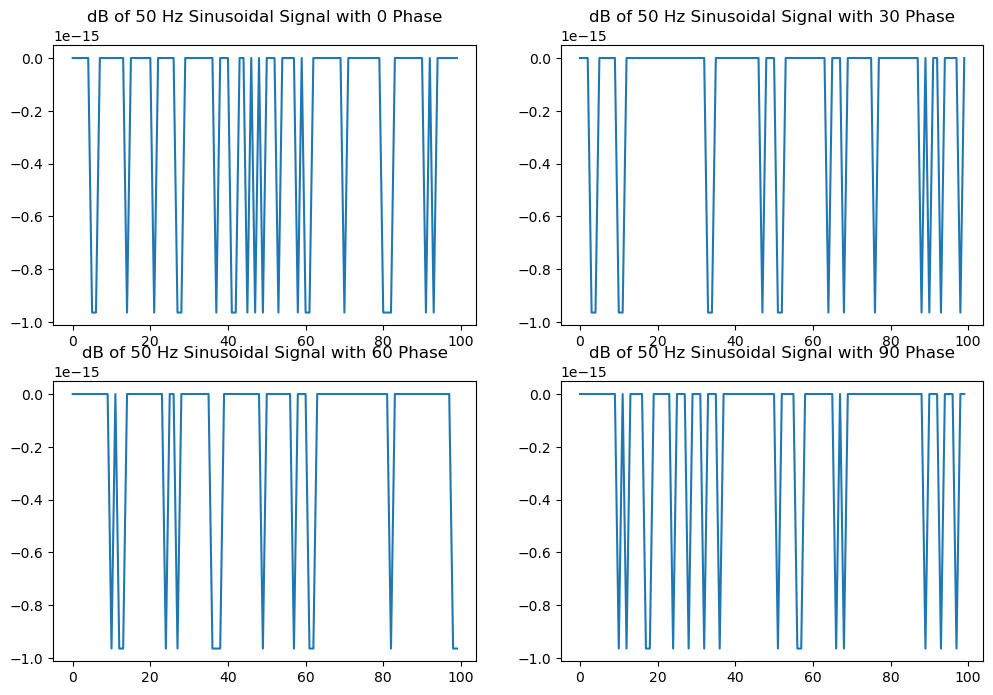

In [8]:
# plot the db of complex signal
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.plot(db(sin_cos_50hz_00phi))
plt.title("dB of 50 Hz Sinusoidal Signal with 0 Phase")
plt.subplot(222)
plt.plot(db(sin_cos_50hz_30phi))
plt.title("dB of 50 Hz Sinusoidal Signal with 30 Phase")
plt.subplot(223)
plt.plot(db(sin_cos_50hz_60phi))
plt.title("dB of 50 Hz Sinusoidal Signal with 60 Phase")
plt.subplot(224)
plt.plot(db(sin_cos_50hz_90phi))
plt.title("dB of 50 Hz Sinusoidal Signal with 90 Phase")
plt.show()